In [70]:
# Name : Neeraja Prabhudesai
# Enrollment no.- 0006

In [71]:
'''Dataset
Name: news_data.csv, sample_news.txt
#Locatoin: https://mitu.co.in/dataset''';

In [72]:
#can find list of the files present in the directory
import os
os.listdir(os.getcwd())

['.anaconda',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.vscode',
 '10_Data_Analysis_using_Pandas.ipynb',
 '11_Tokenization.ipynb',
 '12_Web_Scrapping.ipynb',
 '13_Stemming.ipynb',
 '14_Lemmatization.ipynb',
 '15_POS_Tagging.ipynb',
 '16_Indian_Language_POS_Tagging.ipynb',
 '17_Stopwords.ipynb',
 '18_Sample_Application.ipynb',
 '19_Synonyms and Antonyms.ipynb',
 '1_Python_Basics.ipynb',
 '20_Morphological_Analysis.ipynb',
 '21_NER.ipynb',
 '22_Transliteration.ipynb',
 '23_Computational_Linguistics_Classification.ipynb',
 '24_Text_to_Speech.ipynb',
 '25_Speech_to_text.ipynb',
 '5_Adv_Machine_Learning.ipynb',
 '6_Exception_Handling.ipynb',
 '7_File_Handling.ipynb',
 '8_Classes_and_Objects.ipynb',
 '9_Arrays.ipynb',
 'Advance_Assignment_1.ipynb',
 'Adv_1_Information Extraction.ipynb',
 'Adv_2_Text_Summerization.ipynb',
 'Adv_3_Word_Sense_Disambiguation.ipynb',
 'Adv_4_Data_Preperation.ipynb',
 'Adv_Assig

In [73]:
#import the libraries
#going to classify the data -- if the news is fake or real and build the decision tree
# pandas is used for substitute analysis -- seaborn and matplotlib is used for visualisation of the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# data preperation
# read the dataset

df = pd.read_csv('news_data.csv')
df.shape

(9900, 2)

In [75]:
df.columns
# text - input data, label- o/p data

Index(['Text', 'label'], dtype='object')

In [76]:
# so here we need to seperate i/p and o/p data - whenever we are building the ML algorithm
features = df['Text'] # i/p data - have to find the pattern present in it, convert and seperate
label = df['label'] # o/p data

In [77]:
features.head() # i/p data = x 
#head is the method of fetching first 5 datas from df

0     Top Trump Surrogate BRUTALLY Stabs Him In The...
1    U.S. conservative leader optimistic of common ...
2    Trump proposes U.S. tax overhaul, stirs concer...
3     Court Forces Ohio To Allow Millions Of Illega...
4    Democrats say Trump agrees to work on immigrat...
Name: Text, dtype: object

In [78]:
label # o/p f the i/p data = y - it will truncate the data

0       Fake
1       Real
2       Real
3       Fake
4       Real
        ... 
9895    Fake
9896    Real
9897    Real
9898    Fake
9899    Fake
Name: label, Length: 9900, dtype: object

In [79]:
#to check how many categories are there for o/p data

set(label)

{'Fake', 'Real'}

<Axes: xlabel='label', ylabel='count'>

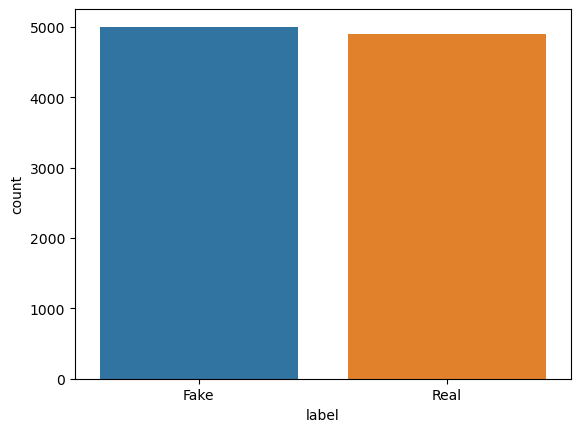

In [80]:
# what balance these labels carry - number of theses categories - chart is available

sns.countplot(x=label)
#almost 50% fake and 50% real

In [81]:
# ML step by step --> preperation/preprocessing - ML model building - Evaluation - prediction on new news

In [82]:
label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e5090cf990>,
 [Text(-0.017452474924647392, 1.0998615417946955, 'Fake'),
  Text(0.017452371948178103, -1.0998615434287093, 'Real')],
 [Text(-0.009519531777080396, 0.599924477342561, '50.51%'),
  Text(0.009519475608097145, -0.5999244782338414, '49.49%')])

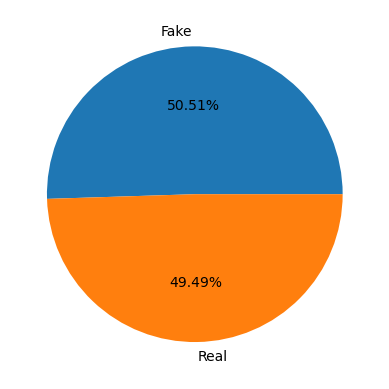

In [83]:
plt.pie(label.value_counts(), labels=label.value_counts().index, autopct='%2.2f%%')

In [84]:
# Data Preperation--
# Data cleaning

In [85]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [86]:
# Step 1 - Tokenize

In [87]:
# Tokenization example
sent = 'Hello friends! How are you? I like Python Programming.'
tokens1 = word_tokenize(sent)
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [88]:
# remove punctuations
tokens2 = [x.lower() for x in tokens1 if x.isalpha()]

In [89]:
tokens2

['hello', 'friends', 'how', 'are', 'you', 'i', 'like', 'python', 'programming']

In [90]:
#remove the stopwords
swords = stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
tokens3 = [x for x in tokens2 if x not in swords]
tokens3

['hello', 'friends', 'like', 'python', 'programming']

In [92]:
#remove suffixes
ps = PorterStemmer()

In [93]:
tokens4 = [ps.stem(x) for x in tokens3]
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [94]:
#define a function for text cleaning
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    tokens4 = [ps.stem(x) for x in tokens3]
    return tokens4

In [95]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [96]:
new_sent = 'It was the expected result. They told the same on fields.'

In [97]:
clean_text(new_sent)

['expect', 'result', 'told', 'field']

In [98]:
features[123]

' Ranking Dem On House Russia Probe Has EXPLOSIVE News For Trump That Will Have Him Running Scared As everybody who still believes in democracy and true freedom reels from FBI Director James Comey s firing, the media and members of Congress have been frantically working to get the deets on what happened. Rep. Adam Schiff, the ranking member of the House Intelligence Committee (which is conducting its own investigation into Russia), just dropped a truth bomb about Comey, and Trump would be wise to go find a cave and hide in it now.Schiff was asked, on CNN, whether he believes this is a cover-up. He doesn t. He thinks it s something worse: It s a brazen interference with a criminal investigation. After all, the president calls this whole investigation a fake, and here you had an FBI director who was seriously looking into whether Trump associates were colluding with the Russians. The end of his statement to CNN should be particularly jarring to anybody familiar with history. Watch below:

In [99]:
clean_text(features[123])

['rank',
 'dem',
 'hous',
 'russia',
 'probe',
 'explos',
 'news',
 'trump',
 'run',
 'scare',
 'everybodi',
 'still',
 'believ',
 'democraci',
 'true',
 'freedom',
 'reel',
 'fbi',
 'director',
 'jame',
 'comey',
 'fire',
 'media',
 'member',
 'congress',
 'frantic',
 'work',
 'get',
 'deet',
 'happen',
 'adam',
 'schiff',
 'rank',
 'member',
 'hous',
 'intellig',
 'committe',
 'conduct',
 'investig',
 'russia',
 'drop',
 'truth',
 'bomb',
 'comey',
 'trump',
 'would',
 'wise',
 'go',
 'find',
 'cave',
 'hide',
 'ask',
 'cnn',
 'whether',
 'believ',
 'think',
 'someth',
 'wors',
 'brazen',
 'interfer',
 'crimin',
 'investig',
 'presid',
 'call',
 'whole',
 'investig',
 'fake',
 'fbi',
 'director',
 'serious',
 'look',
 'whether',
 'trump',
 'associ',
 'collud',
 'russian',
 'end',
 'statement',
 'cnn',
 'particularli',
 'jar',
 'anybodi',
 'familiar',
 'histori',
 'watch',
 'adam',
 'schiff',
 'fire',
 'fbi',
 'director',
 'jame',
 'comey',
 'brazen',
 'interfer',
 'crimin',
 'investi

In [100]:
###Tf IDF vectorization
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
#create the objective
tfidf = TfidfVectorizer(analyzer=clean_text)
#class- TfidfVectorizer
#constructer-(analyzer=clean_text)
#parameter- analyzer
# function- clean_text

In [102]:
#Perform the operation
features_new = tfidf.fit_transform(features)

In [103]:
features_new.shape
#no. of unique words= columns - 33562
# messages - 9900

(9900, 33562)

In [104]:
len(tfidf.get_feature_names_out())

33562

In [105]:
#evaluation of the algorithm--
'''how to find the accuracy of the model is evaluation
the technique used for this, is cross validation
dividing the dataset into 2 parts testing and training
algorithm will learn from the testing data and build/train the model -->decision tree is created on trainng data --> apply the test data as i/p to th algorithm
--> can find the accuracy of the model-->deploy the model''';

In [106]:
#Cross Validation
#total no. of entries are 9990 hence around 75% of the data will go for training
# import the function
from sklearn.model_selection import train_test_split

In [107]:
#perform the cross validation
x_train, x_test, y_train, y_test = train_test_split(features_new, label, random_state=0)
# (input= features_new and output data= labelin testing and training)
#fixed randomization will be done by random state = 0

In [108]:
x_train.shape
# we will be buildng model on train data

(7425, 33562)

In [109]:
x_test.shape

(2475, 33562)

In [110]:
y_train.shape
#only output

(7425,)

In [111]:
y_test.shape

(2475,)

##### buld the decision tree algorithm model on the training data

In [112]:
# import the class - logic is already created in the subpackage
from sklearn.tree import DecisionTreeClassifier

In [113]:
#create the object
dt = DecisionTreeClassifier(random_state=0)

In [114]:
#train the algorithm
# dt is the operator for decesion tree
dt.fit(x_train,y_train)
# which means - it has found the pattern, or it has learnt from the data
#tree s created, and model has been created on the trainig data

DecisionTreeClassifier(random_state=0)

In [115]:
from sklearn.tree import plot_tree

[Text(0.38333333333333336, 0.9166666666666666, 'x[24748] <= 0.003\ngini = 0.5\nsamples = 7425\nvalue = [3727, 3698]'),
 Text(0.2, 0.75, 'x[9696] <= 0.019\ngini = 0.002\nsamples = 3699\nvalue = [3696, 3]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[17132] <= 0.069\ngini = 0.001\nsamples = 3697\nvalue = [3696, 1]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 3696\nvalue = [3696, 0]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5666666666666667, 0.75, 'x[13733] <= 0.017\ngini = 0.017\nsamples = 3726\nvalue = [31, 3695]'),
 Text(0.4, 0.5833333333333334, 'x[13593] <= 0.046\ngini = 0.001\nsamples = 3679\nvalue = [2, 3677]'),
 Text(0.3333333333333333, 0.4166666666666667, 'x[29320] <= 0.035\ngini = 0.001\nsamples = 3678\nvalue = [1, 3677]'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 3677\nvalue = [0, 3677]'),
 Text(0

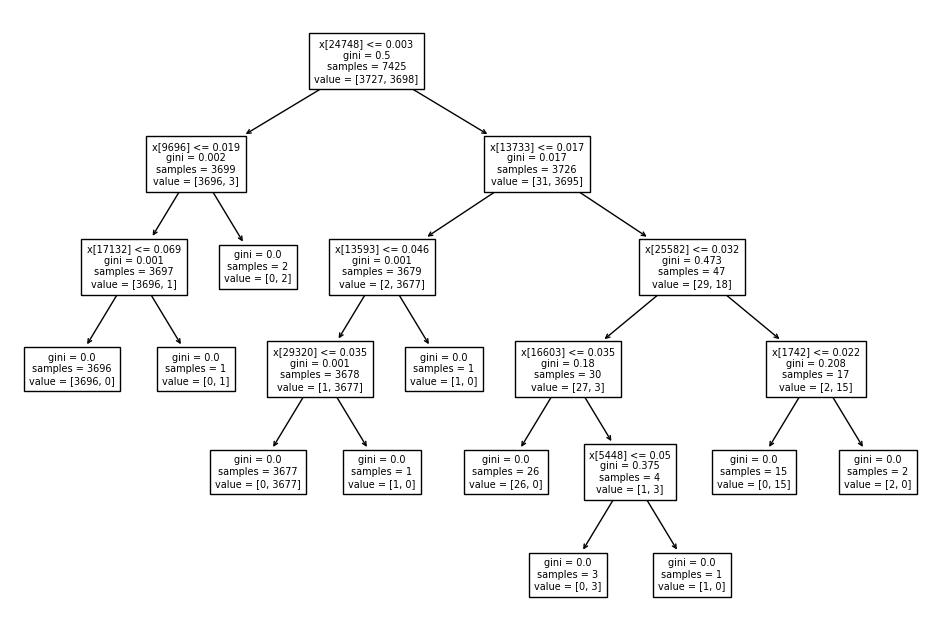

In [124]:
plt.figure(figsize=(12,8))
plot_tree(dt, fontsize=7)
#it does not take all the features, it only takes the features which are important

In [126]:
tfidf.get_feature_names_out()[9696]

'factbox'

In [117]:
# performance evaluation
#Evaluate the algorithm -  to check how much accurate is this
#how many entries are correctly classified and how many entries are wrongly classified , that we have to check- 
#we already know the result, but we have to check it for the accuracy checking

In [118]:
#predict the result on the test data
y_pred = dt.predict(x_test)

In [119]:
#algorithm predicted data
y_pred

array(['Fake', 'Fake', 'Fake', ..., 'Fake', 'Fake', 'Fake'], dtype=object)

In [120]:
len(y_pred)

2475

In [121]:
y_test

6688    Fake
5766    Fake
6335    Fake
5857    Real
7323    Real
        ... 
14      Real
5489    Real
6953    Fake
6780    Fake
6727    Fake
Name: label, Length: 2475, dtype: object

In [123]:
#22/05/2024

help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [127]:
#train test split method- confusion matrix method 
#import the class
from sklearn.metrics import ConfusionMatrixDisplay

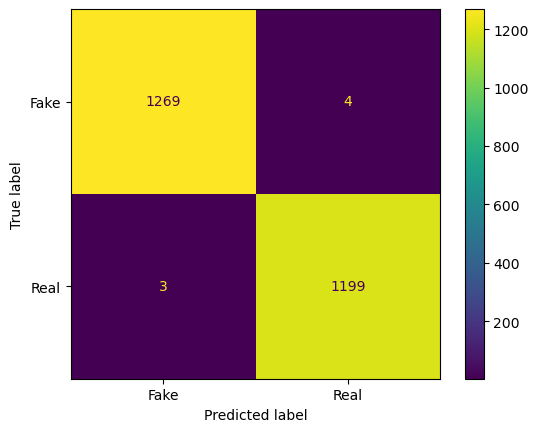

In [130]:
#show the matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);
# 1269+1199 = 24668 are matching (TP)

In [131]:
(1269+1199) / 2475

0.9971717171717172

In [132]:
#fake class - total entries / matched entries
1269 / 1273

0.9968578161822467

In [133]:
#real class
1199 / 2102

0.5704091341579448

In [134]:
# prediction  on unseen new news

In [137]:
f = open('sample_news.txt', encoding = 'utf-8')

In [138]:
news = f.readlines()

In [139]:
news

['" Donald Trump’s ‘Charity’ Foundation Is About To Be Shut The F**k Down NATIONWIDE Things really aren t looking too great for Donald Trump s charity foundation. With recent developments prohibiting the Trump Foundation from soliciting funds in New York state, it s now looking like a good majority of states may be following suit.The Trump Foundation has also been being looked at by the Attorney General for how it is getting and spending funds, especially after what happen with veterans organizations earlier this year.According to The Daily Beast: To make matters worse for the Trump Foundation, the probe may not be limited to New York: Charity experts and lawyers tell The Daily Beast that the attorneys general of other states may soon get involved in a long, drawn-out process.All major charities are required to register with 41 different states across the nation in order to individually request permission to fundraise. When Trump raised money for veterans, he may have broken the rules 

In [141]:
# for prediction - whether it is fake or not, there is predict function available
# we need to vectorize the data to use the predict function
tfidf.transform(news)

<3x33562 sparse matrix of type '<class 'numpy.float64'>'
	with 325 stored elements in Compressed Sparse Row format>

In [142]:
dt.predict(tfidf.transform(news))

array(['Fake', 'Real', 'Fake'], dtype=object)

In [ ]:
# poular algorithm in ML- K-Nearest Neighoubar